In [223]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
from matplotlib.colors import ListedColormap



# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [356]:
class LSH:
    def __init__(self, k, store_digest=False, seed=42):
        """
        
        """
        self.k = k
        self.store_digest = store_digest
        self.seed = seed
        self.unique_classes = 0 
        

    def generate_Wt_2(self):
        """
        Randomly Generate N points on a d-dimensional sphere
        """
        # For reproducibility 
        np.random.seed(self.seed)
        norm = np.random.normal
        normal_deviates = norm(size=(self.d, self.k))
        radius = np.sqrt((normal_deviates**2).sum(axis=0))
        points = normal_deviates/radius
        self.Wt = points.T
    
    def generate_Wt(self):
        """
        Randomly Generate N points on a d-dimensional sphere
        """
        # For reproducibility 
        np.random.seed(self.seed)
        norm = np.random.normal
        self.Wt =  np.random.randn( self.k,self.d,)
        
        
        
    def digest(self, X):
        if self.Wt is None:
            raise("Fit error: please invoke .fit()")
        hashes = ((self.Wt @ X) >=0).astype(int)
        items = list(map(tuple,hashes.T))
        return items 
    
    def transform(self, X):
        """
        X -- d x N matrix 
        """
        mapped = self.digest(X)
        y = []
        for i in mapped:
            if i not in self.hash_table:
                self.hash_table[i] = self.unique_classes
                self.unique_classes +=1 
            class_label = self.hash_table[i]
            y.append(class_label)
        return np.array(y)
            

        
    def fit(self, X):
        self.hash_table = {}
        self.d = X.shape[0]
        self.generate_Wt()
        self.transform(X)
            
        

In [357]:
X = np.random.rand(2, 1000)
X.shape

(2, 1000)

In [358]:
scale = StandardScaler()

In [359]:
X = scale.fit_transform(X.T).T

In [360]:
lsh = LSH(3, seed=12345)

In [361]:
lsh.fit(X)

In [362]:
z = lsh.transform(X)
z

array([0, 0, 0, 1, 0, 1, 2, 3, 4, 4, 1, 1, 0, 1, 1, 1, 4, 4, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 4, 1, 1, 2, 1, 1, 1, 1, 5, 2, 4, 3, 1, 4, 0, 2,
       1, 1, 0, 0, 1, 3, 1, 1, 4, 0, 1, 4, 1, 4, 2, 0, 1, 1, 1, 0, 0, 4,
       1, 1, 1, 4, 4, 1, 4, 0, 0, 1, 2, 1, 3, 4, 4, 4, 4, 4, 0, 1, 0, 1,
       2, 0, 4, 1, 0, 2, 4, 3, 1, 2, 4, 4, 0, 1, 1, 1, 4, 1, 0, 4, 2, 0,
       1, 4, 5, 4, 1, 4, 2, 4, 1, 0, 3, 2, 3, 1, 1, 2, 1, 1, 5, 1, 4, 0,
       0, 2, 2, 1, 4, 3, 2, 1, 4, 1, 4, 4, 5, 4, 4, 2, 4, 0, 0, 0, 2, 1,
       1, 4, 4, 1, 1, 4, 0, 4, 2, 1, 1, 1, 1, 0, 1, 4, 1, 0, 1, 2, 2, 4,
       0, 2, 4, 0, 4, 5, 4, 4, 1, 1, 2, 4, 0, 4, 4, 1, 3, 4, 5, 4, 4, 0,
       1, 2, 4, 1, 0, 4, 5, 1, 1, 4, 4, 1, 4, 1, 3, 2, 3, 4, 2, 4, 2, 4,
       4, 1, 0, 4, 3, 2, 2, 2, 2, 4, 4, 2, 1, 0, 1, 5, 4, 4, 1, 0, 1, 4,
       4, 1, 2, 1, 0, 1, 1, 2, 4, 2, 1, 4, 4, 4, 4, 4, 1, 4, 1, 2, 4, 5,
       4, 2, 3, 0, 4, 2, 1, 0, 0, 4, 5, 1, 4, 0, 0, 2, 1, 1, 2, 4, 5, 4,
       4, 4, 1, 4, 0, 4, 4, 4, 4, 1, 4, 0, 2, 0, 1,

In [363]:
lsh.hash_table

{(0, 0, 1): 0,
 (1, 0, 1): 1,
 (1, 1, 0): 2,
 (1, 0, 0): 3,
 (0, 1, 0): 4,
 (0, 1, 1): 5}

In [364]:
len(lsh.hash_table)

6

In [365]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = lsh.transform(np.c_[xx.ravel().T, yy.ravel().T].T)

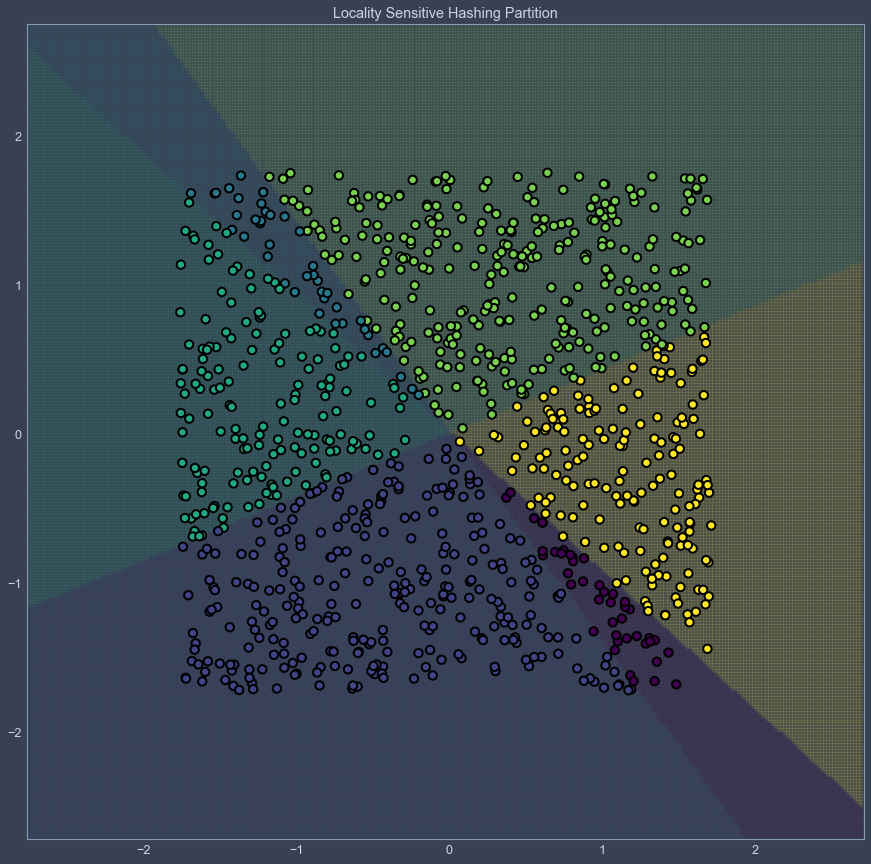

In [366]:
# Put the result into a color plot
origin = [0], [0]

Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,15))
#plt.quiver(*origin, 10 * lsh.Wt[:,0], 10 * lsh.Wt[:,0])
plt.clf()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.viridis_r ,alpha=0.1)
plt.scatter(X[0], X[1], s=70 ,c= lsh.transform(X), cmap=plt.cm.viridis_r, edgecolors='black', alpha=1, linewidths=2, )
plt.title('Locality Sensitive Hashing Partition')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()